<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week6/LinearModels_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
Instead of predicting within a quantitative range, logistic regression places the output into categories (binary classification prediction).

In a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* the cross entropy loss function is used to evaluate the results








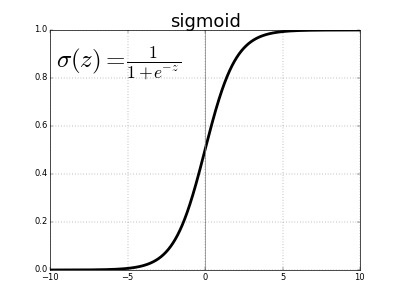

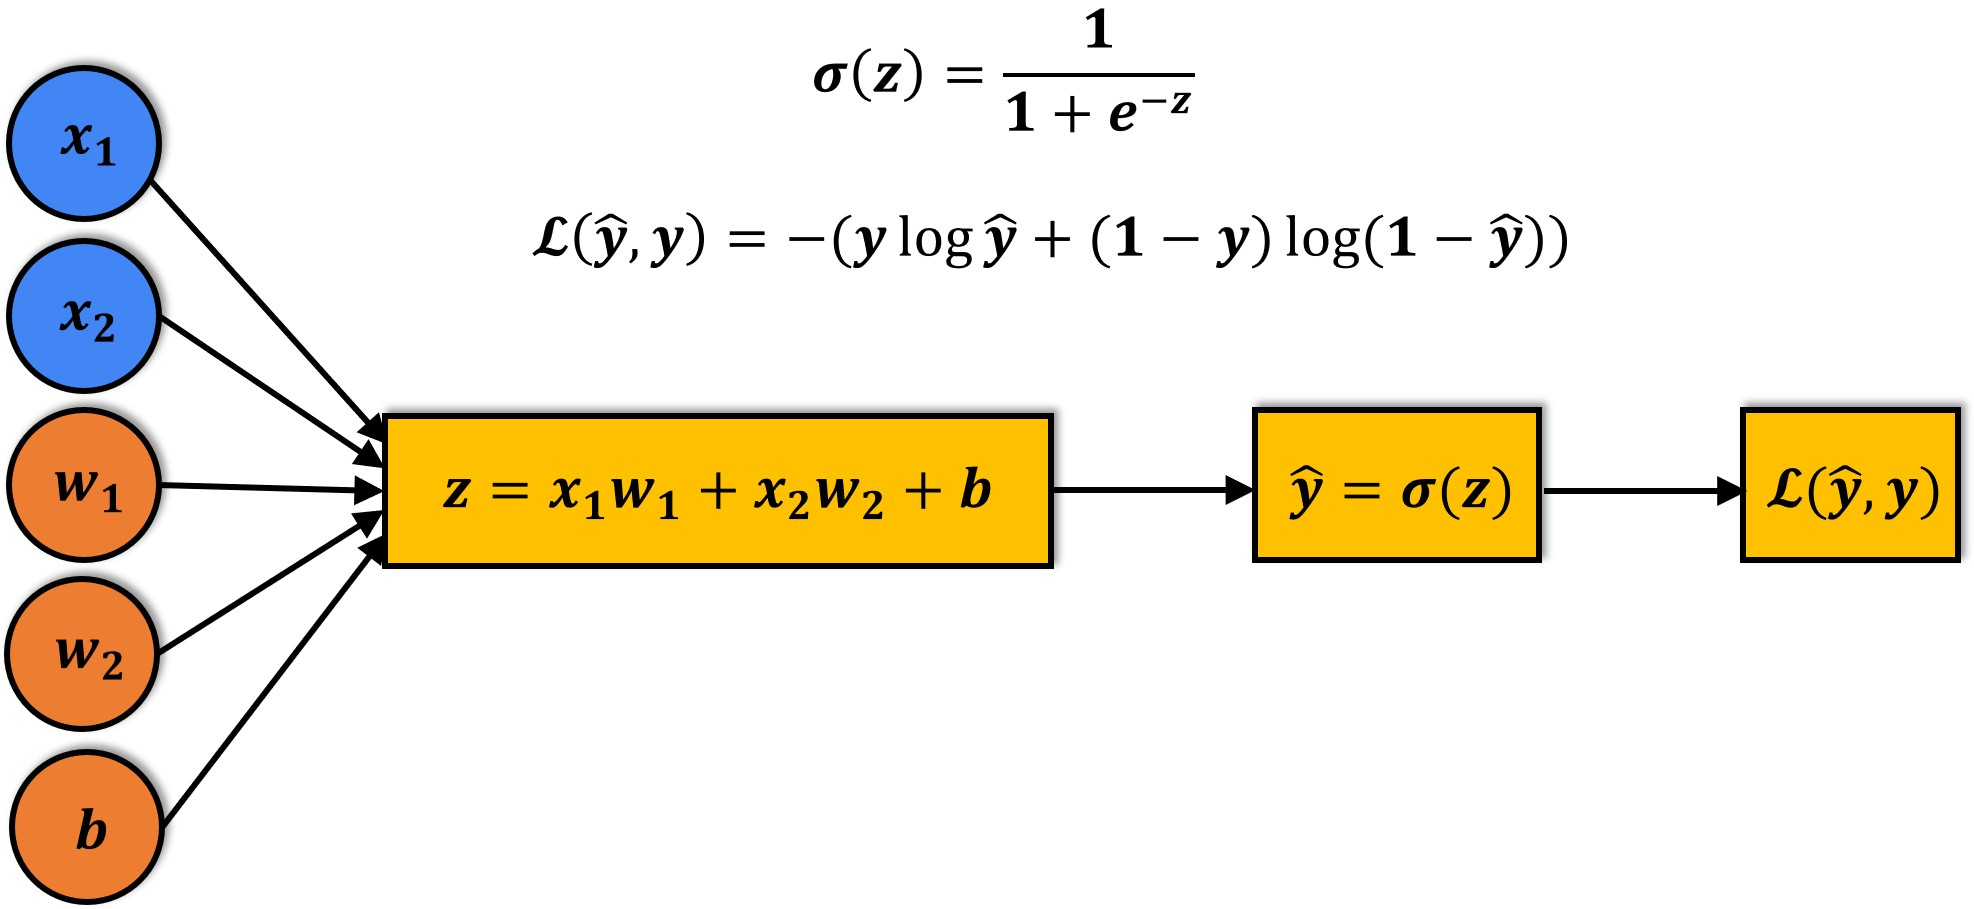

Let's predict if a breast cancer is benign or malignant based on radius, texture, perimeter, etc.

We will create a logistic regression model that models a training dataset, then use it to predict malignancy in a test dataset.

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

**Ten real-valued features are computed for each cell nucleus:**
a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week6/Logistic_regression_data.csv'

breast = pd.read_csv(dataset_url)

### Exploratory analysis

In [ ]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
feature_columns = breast.select_dtypes(exclude = ['int64','object']).columns
features = [i for i in feature_columns if 'Unnamed: 32' not in i]
features = [i.replace(' ', '_') for i in features]

len(features)

30

In [ ]:
breast.rename(columns = dict(zip(feature_columns, features)), inplace=True)

In [ ]:
breast.rename

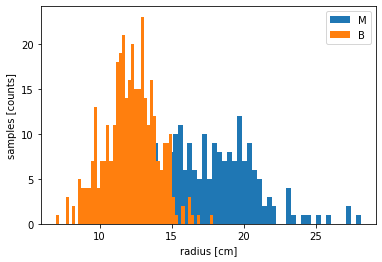

In [ ]:
m = breast['diagnosis'] == 'M'
b = breast['diagnosis'] == 'B'
plt.hist(x='radius_mean', data = breast[m], label = 'M', bins = 50)
plt.hist(x='radius_mean', data = breast[b], label = 'B', bins = 50)
plt.xlabel('radius [cm]')
plt.ylabel('samples [counts]')

plt.legend()


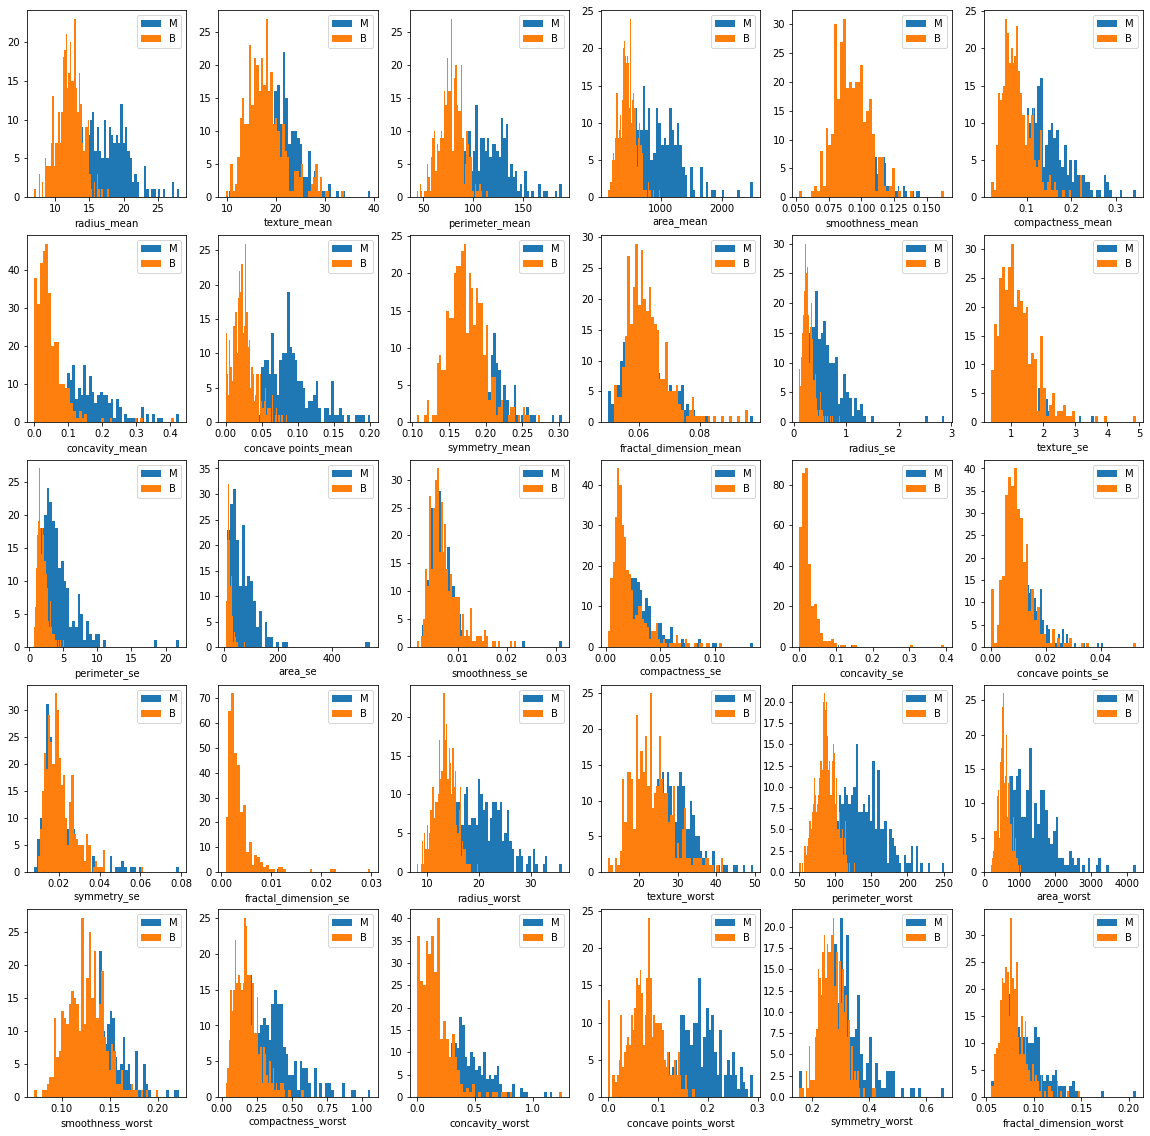

In [ ]:
plt.figure(figsize = (20,20))
i=1
for feature in features:
  m = breast['diagnosis'] == 'M'
  b = breast['diagnosis'] == 'B'
  plt.subplot(5,6, i)
  plt.hist(x=feature, data = breast[m], label = 'M', bins = 50)
  plt.hist(x=feature, data = breast[b], label = 'B', bins = 50)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

### Transform the diagnosis in 0 or 1

In [ ]:
mask = breast['diagnosis'] == 'M'

breast.loc[mask, 'output'] = 1
breast.loc[~mask, 'output'] = 0

### Divide the dataset in training dataset and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast, test_size=0.2, random_state=2021)
# train_df, val_df = train_test_split(breast, test_size=0.25, random_state=2021)


In [ ]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
269,8910720,B,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.74,0.008902,0.047850,0.07339,0.017450,0.02728,0.007610,11.690,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701,NaN,0.0
51,857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025,NaN,0.0
187,874373,B,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,0.2451,0.7655,1.742,17.86,0.006905,0.008704,0.01978,0.011850,0.01897,0.001671,13.010,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097,NaN,0.0
28,852973,M,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.270,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876,NaN,1.0
199,877500,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.01522,0.001976,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,85638502,M,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,0.1938,0.6123,1.334,14.49,0.003350,0.013840,0.01452,0.006853,0.01113,0.001720,16.230,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618,NaN,1.0
128,866458,B,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,0.4309,1.0680,2.796,39.84,0.009006,0.041850,0.03204,0.022580,0.02353,0.004984,16.110,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779,NaN,0.0
57,857793,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.028550,0.02572,0.012720,0.01817,0.004108,17.870,30.70,115.70,985.5,0.1368,0.4290,0.3587,0.18340,0.3698,0.10940,NaN,1.0
341,898143,B,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,0.1844,0.9429,1.429,12.07,0.005954,0.034710,0.05028,0.008510,0.01750,0.004031,10.750,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825,NaN,0.0


### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
input_cols = features
target_col = 'output'

In [ ]:
scaler.fit(train_df[features])
scaler.fit(test_df[features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
train_df[features] = scaler.transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

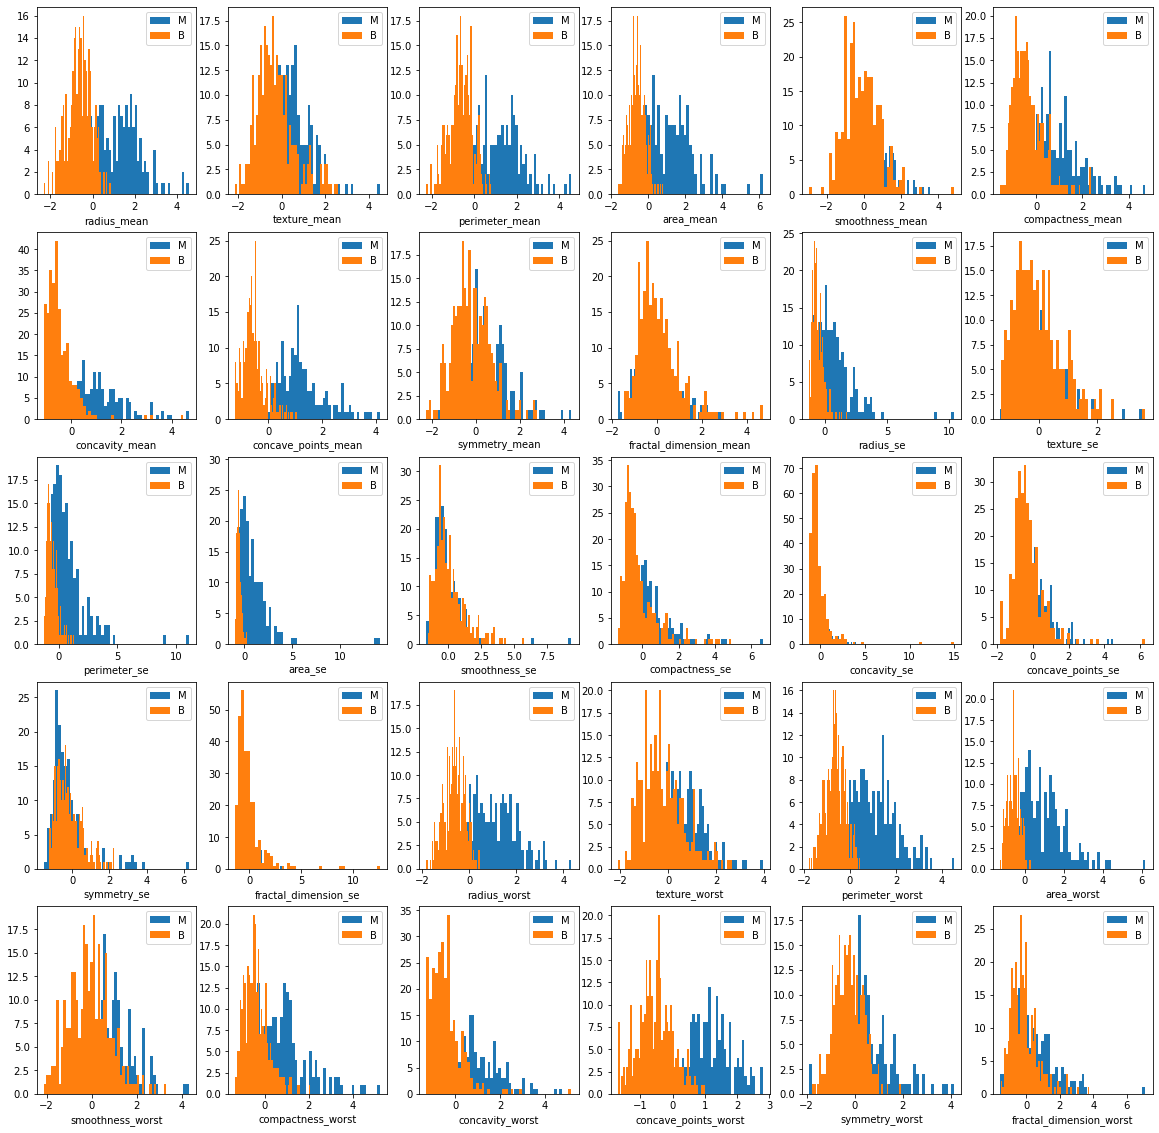

In [ ]:
# check that the scaling worked
plt.figure(figsize = (20,20))
i=1
for feature in features:
  m = train_df['output'] == 1
  b = train_df['output'] == 0
  plt.subplot(5,6, i)
  plt.hist(x=feature, data = train_df[m], label = 'M', bins = 50)
  plt.hist(x=feature, data = train_df[b], label = 'B', bins = 50)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

In [ ]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
269,8910720,B,-1.092690,0.263271,-1.033838,-0.991120,0.969452,0.565020,0.048246,-0.472497,-0.482351,0.892036,-0.379973,0.387000,-0.416143,-0.546739,0.757311,1.371762,1.775582,0.857750,0.607325,1.873451,-0.996238,0.018545,-0.957892,-0.844575,0.253457,0.074675,0.027762,-0.375086,-0.409236,0.257173,NaN,0.0
51,857373,B,-0.142824,-0.650588,-0.201675,-0.237109,-1.234586,-0.747290,-0.843533,-0.779738,-1.588642,-0.388820,-0.938135,-0.465161,-0.872087,-0.721622,-0.946684,-0.791502,-0.784206,-0.600453,-0.928772,-0.562202,-0.343656,-0.307204,-0.343644,-0.394630,-0.864830,-0.546409,-0.738851,-0.377251,-0.780076,-0.127874,NaN,0.0
187,874373,B,-0.768504,-0.458790,-0.790438,-0.740559,0.234070,-0.731537,-0.579422,-0.372590,-1.016180,-0.188731,-0.694413,-0.703060,-0.701035,-0.628106,-0.011701,-0.975332,-0.416594,-0.002366,-0.302509,-0.985878,-0.707175,-0.597476,-0.709619,-0.641616,0.198906,-0.894164,-0.495539,-0.005581,-0.456486,-0.656460,NaN,0.0
28,852973,M,0.395326,1.364415,0.512078,0.296581,0.969452,1.348833,1.182353,1.107753,0.423755,0.438311,0.121784,-0.331671,0.324109,0.096286,-0.655561,0.335697,0.236847,-0.159030,-0.443746,-0.361919,0.882672,1.873058,1.326786,0.723931,1.644497,2.358825,1.991305,1.424513,1.626808,0.926448,NaN,1.0
199,877500,M,0.119767,0.224912,0.140400,-0.001501,0.302968,0.405568,0.501781,0.363553,0.508044,0.334039,-0.845529,-0.875722,-0.873838,-0.584033,-1.113425,-0.539681,-0.407598,-0.700749,-0.713083,-0.839036,0.457837,0.810342,0.341226,0.312897,1.239913,1.040947,1.284615,1.136948,2.666307,1.071126,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,85638502,M,-0.295192,0.583686,-0.285784,-0.371030,0.191887,0.100112,0.022674,0.168036,-0.208412,-0.073186,-0.910353,-0.933879,-0.939223,-0.723317,-1.380673,-0.667390,-0.631682,-0.769865,-1.160883,-0.962287,-0.002036,0.773251,-0.047976,-0.241177,1.017165,0.943422,0.644566,0.779811,1.148581,0.779492,NaN,1.0
128,866458,B,0.330488,-0.639305,0.379571,0.104173,1.447521,1.560155,0.444954,1.049474,0.687158,0.335448,0.087688,-0.247299,-0.085715,-0.007118,0.797359,1.012017,0.084732,1.645677,0.196750,0.609165,-0.028315,-1.090938,-0.035421,-0.201170,0.485297,0.288333,-0.268758,0.495339,-0.430713,-0.267995,NaN,0.0
57,857793,M,0.204055,0.534044,0.190208,0.045687,1.356126,0.711025,0.654673,0.939093,0.778471,0.745491,0.052750,-0.123754,-0.121326,-0.000055,-1.261682,0.214583,-0.173701,0.131259,-0.390098,0.187415,0.357103,0.903874,0.272174,0.206028,0.403471,1.191085,0.571727,1.130764,1.155740,1.532499,NaN,1.0
341,898143,B,-1.450592,-0.537766,-1.403166,-1.205128,-0.674964,-0.138490,0.044729,-0.626923,0.810079,1.262625,-0.949921,-0.435781,-0.883763,-0.791688,-0.377916,0.583921,0.830587,-0.515363,-0.463454,0.150343,-1.202086,-0.326556,-1.122989,-0.948339,-0.210223,0.630314,0.961233,-0.449297,0.130559,0.897399,NaN,0.0


### Training a logistic regression model

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
formula_features = ''
for i in features[:10]:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]

In [ ]:
formula_features

'fractal_dimension_worst + symmetry_worst + concave_points_worst + concavity_worst + compactness_worst + smoothness_worst + area_worst + perimeter_worst + texture_worst + radius_worst + fractal_dimension_se + symmetry_se + concave_points_se + concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean'

In [ ]:

model = smf.logit("output ~ radius_mean + texture_mean", data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.258685
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.6086
Time:                        02:15:14   Log-Likelihood:                -117.70
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 3.382e-80
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7148      0.168     -4.247      0.000      -1.045      -0.385
radius_mean      3.2031      0.357      8.977      0.000       2.504       3.902
texture_mean     0.9513      0.186      5.122      0.000       0.587       1.315
================================================================================
"""

In [ ]:
model = smf.logit("output ~ %s" %formula_features, data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.130964
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.8018
Time:                        02:22:11   Log-Likelihood:                -59.588
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 2.797e-97
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0379      0.544      0.070      0.944      -1.029       1.104
fractal_dimension_mean    -0.3222      0.660     -0.488      0.625      -1.615       0.971
symmetry_mean              0.6239      0.378      1.651      0.099      -0.117       1.364
concave_points_mean        2.2951      1.196      1.919      0.055      -0.049       4.640
concavity_mean             0.6931      0.649      1.068      0.285      -0.579       1.965
compactness_mean          -0.9702      1.189     -0.816      0.414      -3.300       1.360
smoothness_mean            1.3559      0.543      2.498      0.012       0.292       2.420
area_mean                 14.0526      6.210      2.263      0.024       1.881      26.224
perimeter_mean             3.0566     12.048      0.254      0.800     -20.557      26.670
texture_mean               1.7297      0.322      5.367      0.000       1.098       2.361
radius_mean              -12.0960     12.406     -0.975      0.330     -36.412      12.220
==========================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
formula_features = ''
for i in features[:20]:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]

model = smf.logit("output ~ %s" %formula_features, data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.060476
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                           20
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.9085
Time:                        02:22:15   Log-Likelihood:                -27.517
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                5.559e-103
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.9327      1.616      2.434      0.015       0.766       7.100
fractal_dimension_se      -0.9406      1.121     -0.839      0.401      -3.137       1.256
symmetry_se               -1.1731      0.963     -1.218      0.223      -3.061       0.715
concave_points_se          1.6767      1.680      0.998      0.318      -1.616       4.969
concavity_se              -5.9435      2.823     -2.105      0.035     -11.477      -0.410
compactness_se             2.8523      1.924      1.482      0.138      -0.919       6.623
smoothness_se             -1.1001      0.770     -1.429      0.153      -2.608       0.408
area_se                   26.1288     10.339      2.527      0.011       5.865      46.393
perimeter_se              -5.2687      3.688     -1.429      0.153     -12.497       1.959
texture_se                -2.0113      0.809     -2.486      0.013      -3.597      -0.426
radius_se                 -8.3714      6.446     -1.299      0.194     -21.006       4.263
fractal_dimension_mean     3.1413      1.702      1.845      0.065      -0.195       6.478
symmetry_mean              1.9998      0.915      2.184      0.029       0.206       3.794
concave_points_mean        0.0386      2.581      0.015      0.988      -5.020       5.097
concavity_mean            14.9869      4.780      3.135      0.002       5.618      24.356
compactness_mean          -9.0942      4.052     -2.245      0.025     -17.035      -1.153
smoothness_mean            2.0291      1.166      1.741      0.082      -0.256       4.314
area_mean                 20.7025     10.481      1.975      0.048       0.160      41.245
perimeter_mean           -29.4368     28.408     -1.036      0.300     -85.116      26.242
texture_mean               2.9568      0.779      3.796      0.000       1.430       4.484
radius_mean               11.3296     27.847      0.407      0.684     -43.249      65.908
==========================================================================================

Possibly complete quasi-separation: A fraction 0.57 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
formula_features = ''
for i in features:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]
formula_features

'fractal_dimension_worst + symmetry_worst + concave_points_worst + concavity_worst + compactness_worst + smoothness_worst + area_worst + perimeter_worst + texture_worst + radius_worst + fractal_dimension_se + symmetry_se + concave_points_se + concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean'

In [ ]:
# removed some features that caused a singular matrix
model = smf.logit("output ~ fractal_dimension_worst +   \
 fractal_dimension_se + symmetry_se + concave_points_se + \
concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + \
radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + \
compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean", data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.041640
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      433
Method:                           MLE   Df Model:                           21
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.9370
Time:                        02:32:28   Log-Likelihood:                -18.946
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                7.487e-106
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1913      2.240      1.871      0.061      -0.199       8.582
fractal_dimension_worst     7.1527      2.440      2.932      0.003       2.371      11.934
fractal_dimension_se       -4.5221      2.396     -1.888      0.059      -9.218       0.174
symmetry_se                -1.7811      1.142     -1.559      0.119      -4.020       0.457
concave_points_se           5.3834      2.979      1.807      0.071      -0.456      11.223
concavity_se               -6.2280      2.834     -2.198      0.028     -11.782      -0.674
compactness_se              4.0729      2.583      1.577      0.115      -0.990       9.136
smoothness_se              -1.8384      1.603     -1.147      0.252      -4.981       1.304
area_se                    35.8219     14.621      2.450      0.014       7.166      64.478
perimeter_se              -12.4159      6.188     -2.007      0.045     -24.544      -0.288
texture_se                 -1.9541      1.212     -1.612      0.107      -4.330       0.422
radius_se                  -5.7163      8.298     -0.689      0.491     -21.979      10.547
fractal_dimension_mean      1.6280      2.744      0.593      0.553      -3.749       7.005
symmetry_mean               2.7297      1.504      1.814      0.070      -0.219       5.678
concave_points_mean        -0.7498      3.553     -0.211      0.833      -7.714       6.214
concavity_mean             17.8661      7.216      2.476      0.013       3.723      32.009
compactness_mean          -18.3598      8.636     -2.126      0.034     -35.287      -1.433
smoothness_mean             4.3647      2.442      1.788      0.074      -0.421       9.150
area_mean                  24.0243     15.098      1.591      0.112      -5.568      53.617
perimeter_mean            -18.0838     48.987     -0.369      0.712    -114.096      77.928
texture_mean                4.0966      1.497      2.737      0.006       1.163       7.030
radius_mean                -0.0327     45.597     -0.001      0.999     -89.401      89.336
===========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Making predictions and evaluating the model

Testing the predictions on the train dataset

In [ ]:
train_preds = model.predict(train_df[features])

In [ ]:
round(train_preds)

269    0.0
51     0.0
187    0.0
28     1.0
199    1.0
      ... 
44     1.0
128    0.0
57     1.0
341    0.0
116    0.0
Length: 455, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_df['output'], round(train_preds))
print("Accuracy: {:.2f} %".format(100*accuracy))

Accuracy: 98.46 %


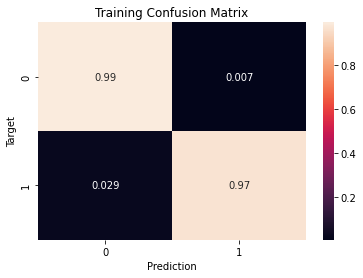

In [ ]:
from sklearn.metrics import confusion_matrix
cf =confusion_matrix(train_df['output'], round(train_preds), normalize='true')
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix');

Testing the predictions on the test dataset

Accuracy: 92.11 %


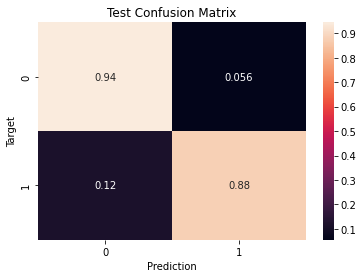

In [ ]:
test_preds = model.predict(test_df[features])
accuracy = accuracy_score(test_df['output'], round(test_preds))
print("Accuracy: {:.2f} %".format(100*accuracy))
cf =confusion_matrix(test_df['output'], round(test_preds), normalize='true')
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');
